# Wstęp do uczenia maszynowego - praca domowa 1

### Autorzy: Jan Skwarek, Daniel Tytkowski

### Walidujemy: Patryk Rakus, Łukasz Tomaszewski 

Najpierw importujemy wszystkie potrzebne biblioteki.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Do walidacji korzystamy z próbki, która nie była dostępna dla budownicznych.

In [2]:
df_build = pd.read_csv('german_credit_data_dataset.csv')
df_build = df_build.sample(frac=0.7, random_state=500)
df = pd.read_csv('german_credit_data_dataset.csv')
df = df[~df.isin(df_build)].dropna()

# Eksploracyjna analiza danych (EDA)

Spójrzmy najpierw na ogólny wygląd analizowanej przez nas ramki danych.

In [3]:
df

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
3,A11,42.0,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2.0,A191,A201,1.0
8,A14,12.0,A32,A43,3059.0,A64,A74,2.0,A91,A101,...,A121,61.0,A143,A152,1.0,A172,1.0,A191,A201,1.0
14,A11,15.0,A32,A40,1403.0,A61,A73,2.0,A92,A101,...,A123,28.0,A143,A151,1.0,A173,1.0,A191,A201,1.0
15,A11,24.0,A32,A43,1282.0,A62,A73,4.0,A92,A101,...,A123,32.0,A143,A152,1.0,A172,1.0,A191,A201,2.0
18,A12,24.0,A32,A41,12579.0,A61,A75,4.0,A92,A101,...,A124,44.0,A143,A153,1.0,A174,1.0,A192,A201,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,A11,18.0,A32,A43,1936.0,A65,A74,2.0,A94,A101,...,A123,23.0,A143,A151,2.0,A172,1.0,A191,A201,1.0
994,A14,12.0,A32,A40,2390.0,A65,A75,4.0,A93,A101,...,A123,50.0,A143,A152,1.0,A173,1.0,A192,A201,1.0
996,A11,30.0,A32,A41,3857.0,A61,A73,4.0,A91,A101,...,A122,40.0,A143,A152,1.0,A174,1.0,A192,A201,1.0
997,A14,12.0,A32,A43,804.0,A61,A75,4.0,A93,A101,...,A123,38.0,A143,A152,1.0,A173,1.0,A191,A201,1.0


Widzimy już więc wstępny zarys ramki danych, ma 300 wierszy i 21 kolumn. Spójrzmy na "głowę".

In [4]:
df.head()

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
3,A11,42.0,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2.0,A191,A201,1.0
8,A14,12.0,A32,A43,3059.0,A64,A74,2.0,A91,A101,...,A121,61.0,A143,A152,1.0,A172,1.0,A191,A201,1.0
14,A11,15.0,A32,A40,1403.0,A61,A73,2.0,A92,A101,...,A123,28.0,A143,A151,1.0,A173,1.0,A191,A201,1.0
15,A11,24.0,A32,A43,1282.0,A62,A73,4.0,A92,A101,...,A123,32.0,A143,A152,1.0,A172,1.0,A191,A201,2.0
18,A12,24.0,A32,A41,12579.0,A61,A75,4.0,A92,A101,...,A124,44.0,A143,A153,1.0,A174,1.0,A192,A201,2.0


Sprawdźmy, czy mamy jakieś kolumny z brakiem danych.

In [5]:
df.isna().sum()

checking_account_status    0
duration                   0
credit_history             0
purpose                    0
credit_amount              0
savings                    0
present_employment         0
installment_rate           0
personal                   0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
existing_credits           0
job                        0
dependents                 0
telephone                  0
foreign_worker             0
customer_type              0
dtype: int64

Jak widać, nie mamy żadnych braków danych. Możemy więc kontynuować naszą analizę.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 3 to 998
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   checking_account_status  300 non-null    object 
 1   duration                 300 non-null    float64
 2   credit_history           300 non-null    object 
 3   purpose                  300 non-null    object 
 4   credit_amount            300 non-null    float64
 5   savings                  300 non-null    object 
 6   present_employment       300 non-null    object 
 7   installment_rate         300 non-null    float64
 8   personal                 300 non-null    object 
 9   other_debtors            300 non-null    object 
 10  present_residence        300 non-null    float64
 11  property                 300 non-null    object 
 12  age                      300 non-null    float64
 13  other_installment_plans  300 non-null    object 
 14  housing                  3

Spróbujmy pozyskać dodatkowe informacje.

In [7]:
df.describe()

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents,customer_type
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,20.626667,3182.280000,3.000000,2.823333,35.993333,1.363333,1.146667,1.286667
std,11.923977,2673.975363,1.103355,1.126804,11.634625,0.564847,0.354364,0.452960
min,4.000000,362.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1393.000000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2337.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3858.500000,4.000000,4.000000,43.000000,2.000000,1.000000,2.000000
max,60.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


Spójrzmy na rozkłady zmiennych

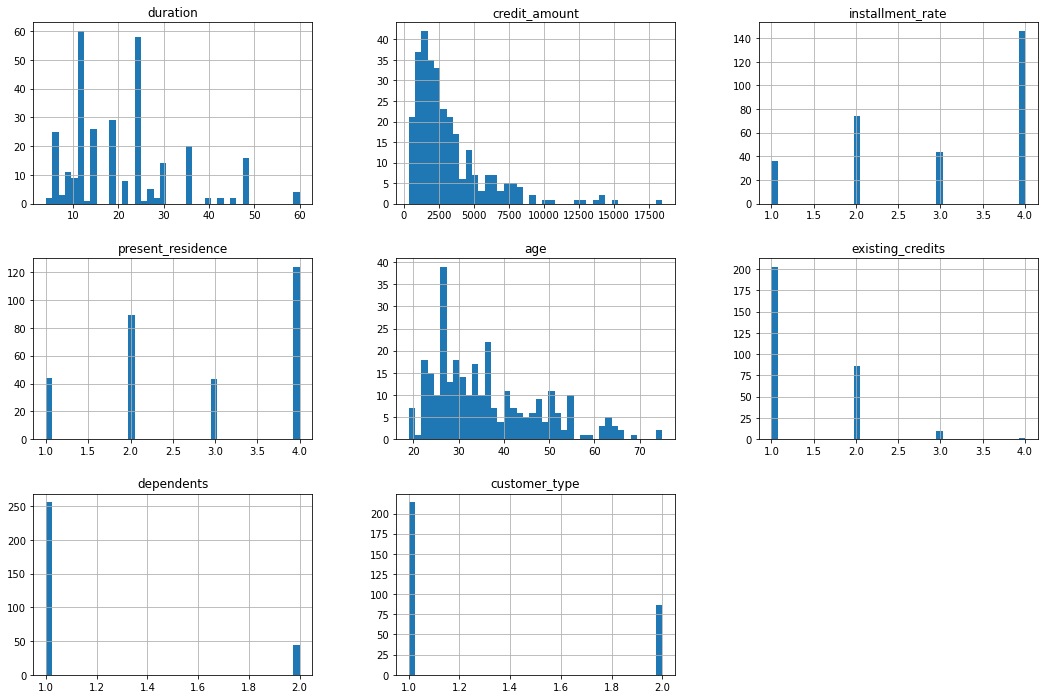

In [8]:
df.hist(bins = 40, figsize=(18, 12))
plt.show()

Najciekawiej wygląda rozkład zmiennej 'credit_amount'. Jest to bowiem rozkład jednomodalny asymetryczny prawostronny. W analizie jednowymiarowej zbadamy każdą zmienną oddzielnie.

## Analiza jednowymiarowa

### checking_account_status

Pierwsza zmienna to 'checking_account_status'. Spójrzmy jakie wartości przyjmuje.

In [9]:
df['checking_account_status'].value_counts()

A14    116
A12     82
A11     80
A13     22
Name: checking_account_status, dtype: int64

Zwizualizujmy to na wykresie

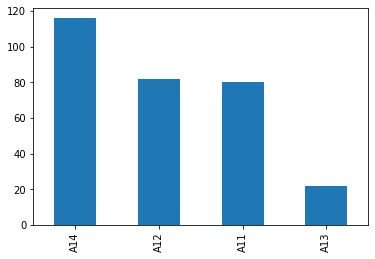

In [10]:
df['checking_account_status'].value_counts().plot(kind="bar")
plt.show()

Nic szczególnie ciekawego na ten moment sobie o tej zmiennej nie powiemy.

### duration 

Zacznijmy znowu od wartości.

In [11]:
df['duration'].value_counts()

24.0    58
12.0    57
18.0    29
15.0    25
6.0     25
36.0    20
48.0    16
30.0    14
9.0     11
10.0     9
21.0     8
27.0     5
60.0     4
11.0     3
4.0      2
28.0     2
42.0     2
7.0      2
45.0     2
26.0     1
14.0     1
39.0     1
40.0     1
8.0      1
13.0     1
Name: duration, dtype: int64

Tym razem trochę ich jest. Spójrzmy ile dokładnie.

In [12]:
df['duration'].value_counts().size

25

Mamy 25 unikalnych wartości. Część z nich pojawia się ponad 50 razy ("24.0", "12.0"), a część z nich pojawia się maksymalnie dwa razy (tych akurat jest stosunkowo dużo, zliczmy je).

In [13]:
(df['duration'].value_counts() <= 2).sum()

11

Jest aż 11 takich wartości. Teraz przyjrzyjmy się danym statystycznym wartości tej zmiennej i wygenerujmy sobie boxplota.

In [14]:
df['duration'].describe()

count    300.000000
mean      20.626667
std       11.923977
min        4.000000
25%       12.000000
50%       18.000000
75%       24.000000
max       60.000000
Name: duration, dtype: float64

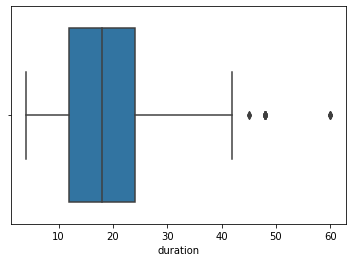

In [15]:
sns.boxplot(df['duration'])
plt.show()

Boxplot pokazuje nam, że istnieją outliery z prawej strony. Znajdźmy je za pomocą rozstępu ćwiartkowego.

In [16]:
IQR = 24 - 12
print(12 - IQR * 1.5)
print(24 + IQR * 1.5)

-6.0
42.0


Według obliczeń outliery to wyniki powyżej 42.0, ile ich jest?

In [17]:
(df['duration']>42).sum()

22

Sprawdźmy jak dane wyglądają na histogramie.

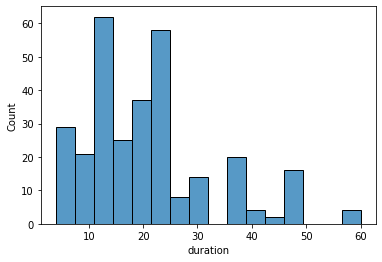

In [18]:
sns.histplot(df['duration'])
plt.show()

### credit_history 

Nie jest to za ciekawa kolumna. Ponownie ograniczymy się do zliczenia unikatowych wartości i zwizualizowania ich na jakimś wykresie.

In [19]:
df['credit_history'].value_counts()

A32    161
A34     83
A33     25
A31     19
A30     12
Name: credit_history, dtype: int64

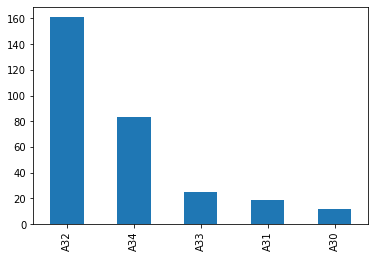

In [20]:
df['credit_history'].value_counts().plot(kind="bar")
plt.show()

### purpose

Podobnie zrobimy w tym przypadku.

In [21]:
df['purpose'].value_counts()

A43     86
A40     69
A42     51
A41     41
A49     28
A46     13
A45      6
A48      2
A410     2
A44      2
Name: purpose, dtype: int64

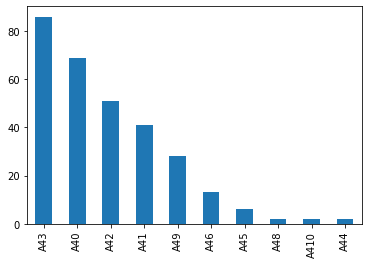

In [22]:
df['purpose'].value_counts().plot(kind="bar")
plt.show()

### credit_amount

Tej zmiennej przyjrzymy się nieco dogłębniej.

In [23]:
df['credit_amount'].value_counts()

1393.0     2
1282.0     2
1413.0     2
717.0      2
1409.0     2
          ..
14318.0    1
13756.0    1
3079.0     1
3850.0     1
1845.0     1
Name: credit_amount, Length: 294, dtype: int64

Wygląda na to, że prawie każda obserwacja przyjmuje unikatową wartość tej zmiennej.

In [24]:
df['credit_amount'].describe()

count      300.000000
mean      3182.280000
std       2673.975363
min        362.000000
25%       1393.000000
50%       2337.500000
75%       3858.500000
max      18424.000000
Name: credit_amount, dtype: float64

Spójrzmy na boxplot.

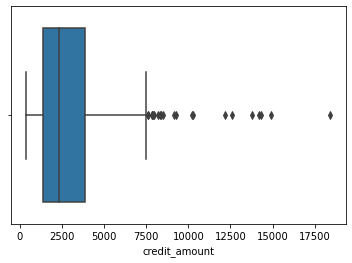

In [25]:
sns.boxplot(df['credit_amount'])
plt.show()

Zbadajmy outliery tą samą metodą co wcześniej.

In [26]:
IQR = 3858.5 - 1393
print(1393 - IQR * 1.5)
print(3858.5 + IQR * 1.5)

-2305.25
7556.75


Ile ich jest?

In [27]:
(df['credit_amount']>7785).sum()

19

Obejrzmy histogram.

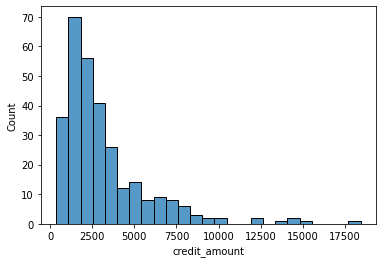

In [28]:
sns.histplot(df['credit_amount'])
plt.show()

### savings 

Ograniczymy się do zliczenia unikatowych wartości i zwizualizowania ich na jakimś wykresie. Od tej pory będziemy postępować tak domyślnie przy mniej ciekawych zmiennych.

In [29]:
df['savings'].value_counts()

A61    177
A65     59
A62     32
A63     17
A64     15
Name: savings, dtype: int64

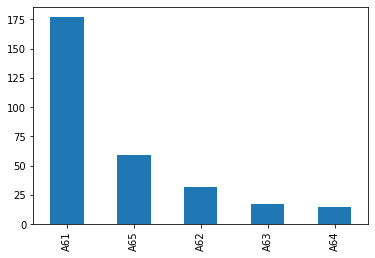

In [30]:
df['savings'].value_counts().plot(kind="bar")
plt.show()

### present_employment 

In [31]:
df['present_employment'].value_counts()

A73    110
A75     72
A74     51
A72     48
A71     19
Name: present_employment, dtype: int64

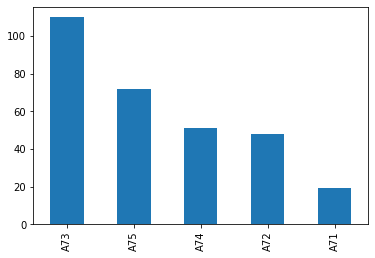

In [32]:
df['present_employment'].value_counts().plot(kind="bar")
plt.show()

### installment_rate 

In [33]:
df['installment_rate'].value_counts()

4.0    146
2.0     74
3.0     44
1.0     36
Name: installment_rate, dtype: int64

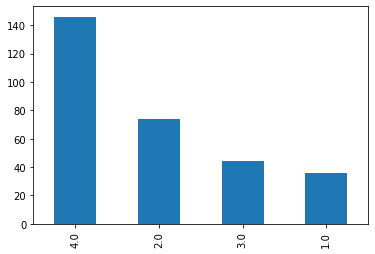

In [34]:
df['installment_rate'].value_counts().plot(kind="bar")
plt.show()

In [35]:
df['installment_rate'].describe()

count    300.000000
mean       3.000000
std        1.103355
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: installment_rate, dtype: float64

### personal

In [36]:
df['personal'].value_counts()

A93    178
A92     71
A94     37
A91     14
Name: personal, dtype: int64

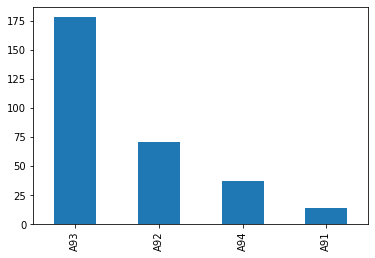

In [37]:
df['personal'].value_counts().plot(kind="bar")
plt.show()

### other_debtors 

In [38]:
df['other_debtors'].value_counts()

A101    273
A103     16
A102     11
Name: other_debtors, dtype: int64

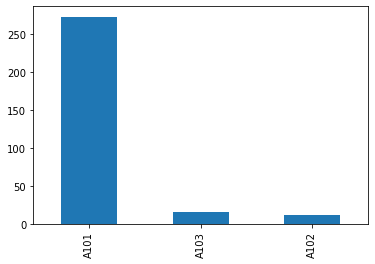

In [39]:
df['other_debtors'].value_counts().plot(kind="bar")
plt.show()

### present_residence 

In [40]:
df['present_residence'].value_counts()

4.0    124
2.0     89
1.0     44
3.0     43
Name: present_residence, dtype: int64

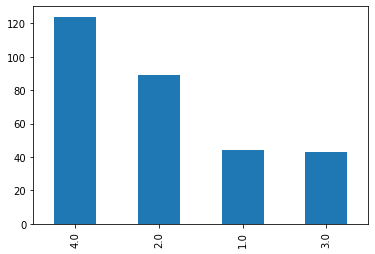

In [41]:
df['present_residence'].value_counts().plot(kind="bar")
plt.show()

In [42]:
df['present_residence'].describe()

count    300.000000
mean       2.823333
std        1.126804
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: present_residence, dtype: float64

### property 

In [43]:
df['property'].value_counts()

A123    92
A121    89
A122    68
A124    51
Name: property, dtype: int64

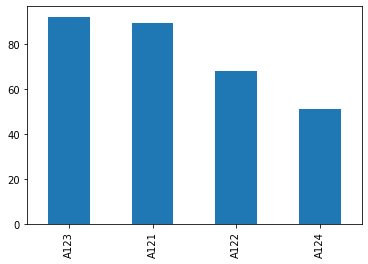

In [44]:
df['property'].value_counts().plot(kind="bar")
plt.show()

### age 

In [45]:
df['age'].value_counts()

27.0    20
26.0    19
24.0    15
31.0    14
28.0    13
37.0    12
23.0    12
25.0    10
35.0    10
36.0    10
30.0    10
32.0    10
34.0     9
50.0     8
40.0     8
29.0     8
54.0     8
33.0     8
42.0     7
38.0     7
46.0     6
20.0     6
22.0     6
52.0     6
47.0     5
43.0     5
45.0     5
63.0     5
39.0     4
49.0     4
48.0     4
51.0     3
61.0     3
41.0     3
55.0     2
66.0     2
65.0     2
53.0     2
21.0     1
57.0     1
19.0     1
44.0     1
75.0     1
74.0     1
59.0     1
68.0     1
64.0     1
Name: age, dtype: int64

W końcu coś ciekawego! Przyjrzyjmy się głębiej.

In [46]:
df['age'].value_counts().size

47

Aż 47 unikalnych wartości (na 300 kolumn).

In [47]:
df['age'].describe()

count    300.000000
mean      35.993333
std       11.634625
min       19.000000
25%       27.000000
50%       33.000000
75%       43.000000
max       75.000000
Name: age, dtype: float64

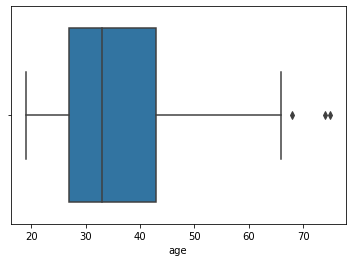

In [48]:
sns.boxplot(df['age'])
plt.show()

Sprawdźmy wartości odstające.

In [49]:
IQR = 43 - 27
print(27 - IQR * 1.5)
print(43 + IQR * 1.5)

3.0
67.0


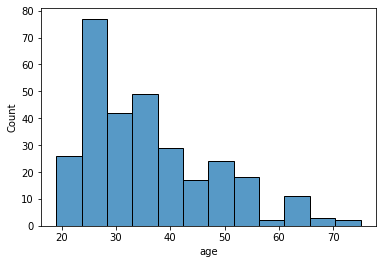

In [50]:
sns.histplot(df['age'])
plt.show()

### other_installment_plans

In [51]:
df['other_installment_plans'].value_counts()

A143    256
A141     31
A142     13
Name: other_installment_plans, dtype: int64

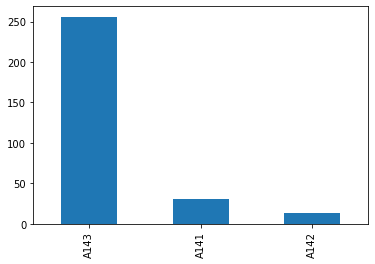

In [52]:
df['other_installment_plans'].value_counts().plot(kind="bar")
plt.show()

### housing

In [53]:
df['housing'].value_counts()

A152    220
A151     41
A153     39
Name: housing, dtype: int64

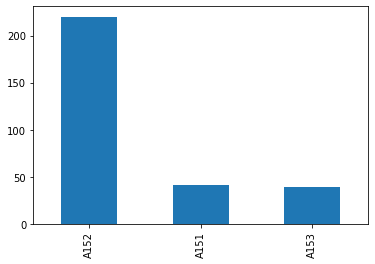

In [54]:
df['housing'].value_counts().plot(kind="bar")
plt.show()

### existing_credits

In [55]:
df['existing_credits'].value_counts()

1.0    203
2.0     86
3.0     10
4.0      1
Name: existing_credits, dtype: int64

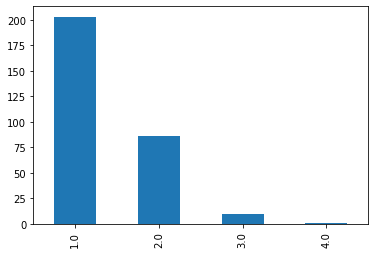

In [56]:
df['existing_credits'].value_counts().plot(kind="bar")
plt.show()

In [57]:
df['existing_credits'].describe()

count    300.000000
mean       1.363333
std        0.564847
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: existing_credits, dtype: float64

### job

In [58]:
df['job'].value_counts()

A173    195
A172     54
A174     44
A171      7
Name: job, dtype: int64

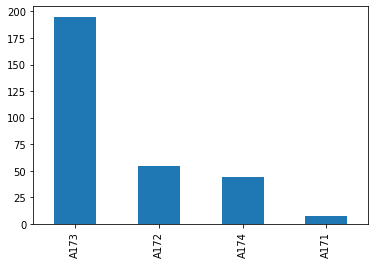

In [59]:
df['job'].value_counts().plot(kind="bar")
plt.show()

### dependents

In [60]:
df['dependents'].value_counts()

1.0    256
2.0     44
Name: dependents, dtype: int64

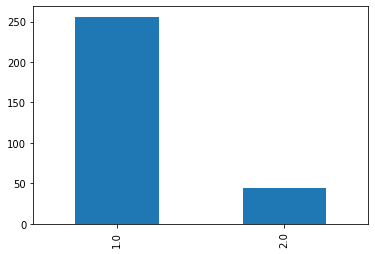

In [61]:
df['dependents'].value_counts().plot(kind="bar")
plt.show()

In [62]:
df['dependents'].describe()

count    300.000000
mean       1.146667
std        0.354364
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: dependents, dtype: float64

### telephone

In [63]:
df['telephone'].value_counts()

A191    182
A192    118
Name: telephone, dtype: int64

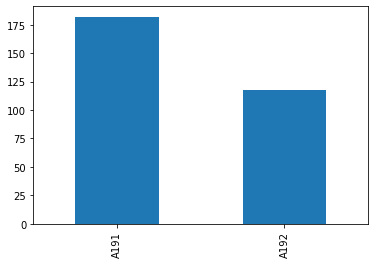

In [64]:
df['telephone'].value_counts().plot(kind="bar")
plt.show()

### foreign_worker

In [65]:
df['foreign_worker'].value_counts()

A201    287
A202     13
Name: foreign_worker, dtype: int64

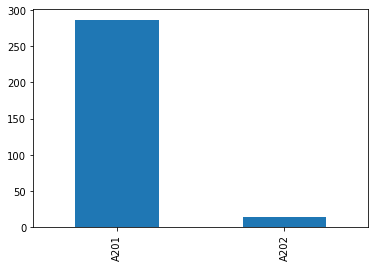

In [66]:
df['foreign_worker'].value_counts().plot(kind="bar")
plt.show()

### customer_type

In [67]:
df['customer_type'].value_counts()

1.0    214
2.0     86
Name: customer_type, dtype: int64

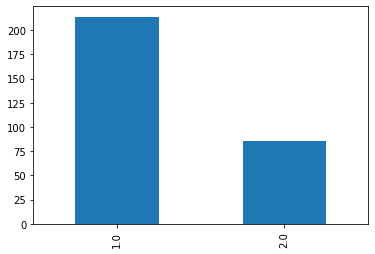

In [68]:
df['customer_type'].value_counts().plot(kind="bar")
plt.show()

## Analiza wielowymiarowa

<function matplotlib.pyplot.show(close=None, block=None)>

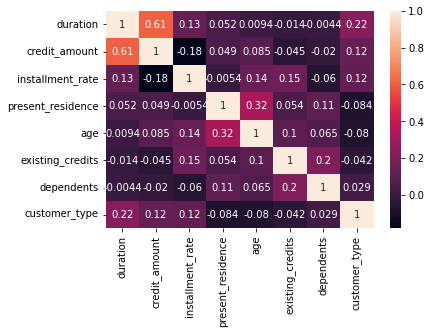

In [69]:
corr = df.corr()
sns.heatmap(corr, annot= True)
plt.show

Rzeczywiście najbardziej zauwazalna korelacja zmiennych ciągłych występuje pomiędzy wartościami z kolumny duration, a z kolumny credit_amount

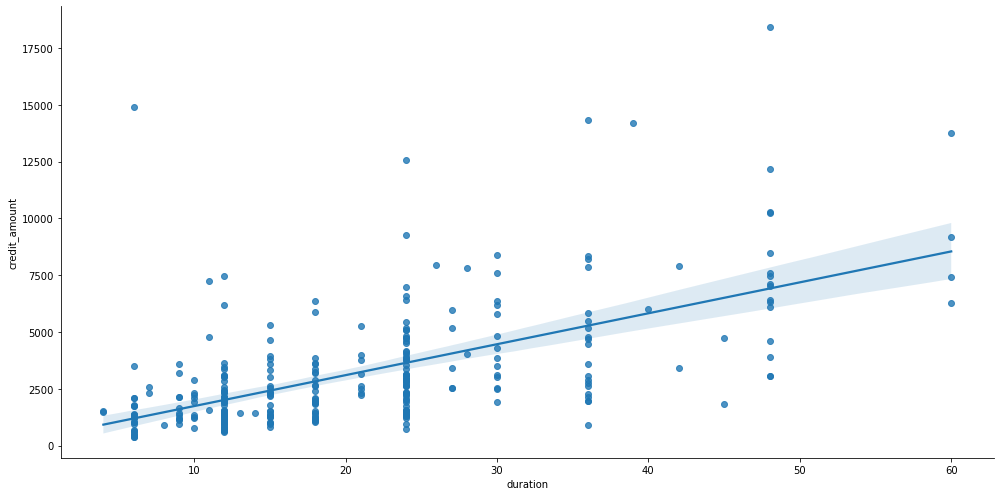

In [70]:
sns.lmplot( x='duration', y='credit_amount', data=df, size=7, aspect=2)
plt.show()

Zauwazamy wzrost kwoty, wraz w wzrostem długości kredytu. Równiez pojawiają się szczególne przypadki jak kredyt na wysoką kwotę z bardzo krótkim okresem spłaty. Ładnie na tym wykresie widać skoki wartości duration.

Druga największa korelacja zachodzi pomiędzy age i presenet_residence.

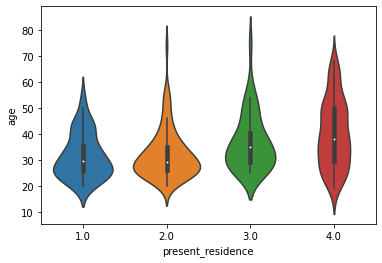

In [71]:
sns.violinplot(df["present_residence"],df["age"])
plt.show()

Sprawdźmy jak poszczególne zmienne ciągłe wpływają na to czy klient był uznany jaki dobry czy zły

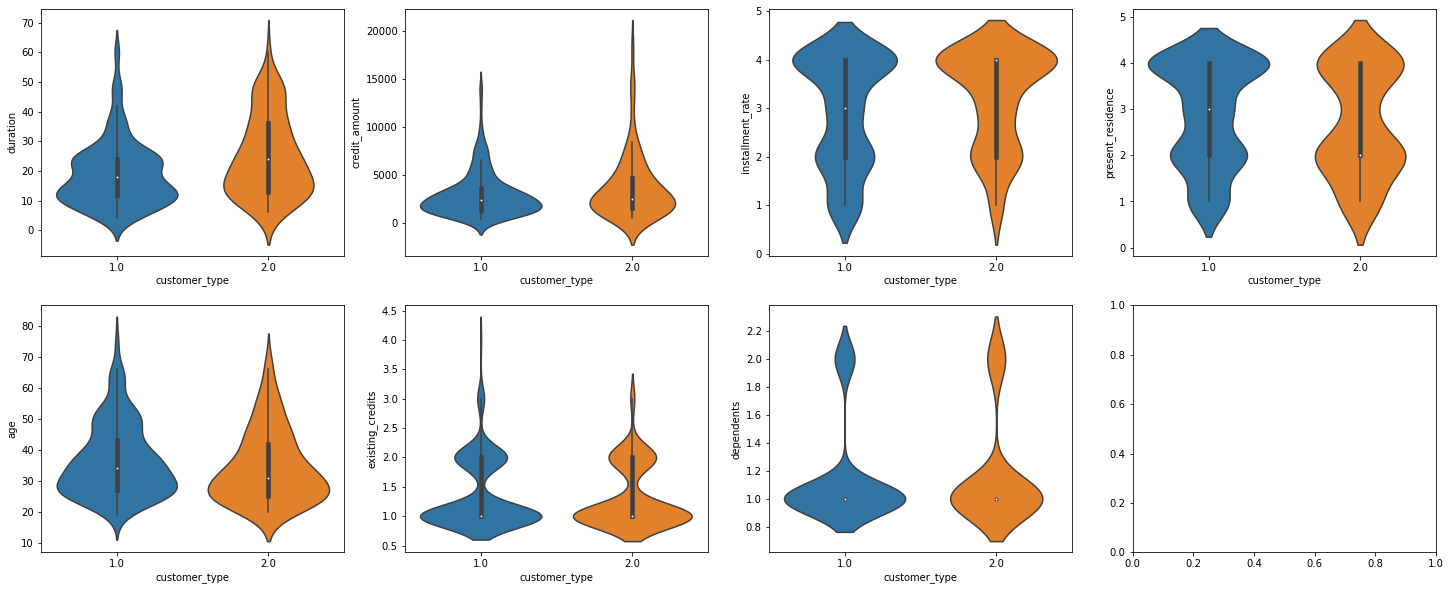

In [72]:
fig, axs = plt.subplots(nrows=2,ncols=4, figsize = (25,10))
sns.violinplot(df['customer_type'], df['duration'],ax=axs[0,0])
sns.violinplot(df['customer_type'], df['credit_amount'],ax=axs[0,1])
sns.violinplot(df['customer_type'], df['installment_rate'], ax=axs[0,2])
sns.violinplot(df['customer_type'], df['present_residence'], ax=axs[0,3])
sns.violinplot(df['customer_type'], df['age'], ax=axs[1,0])
sns.violinplot(df['customer_type'], df['existing_credits'], ax=axs[1,1])
sns.violinplot(df['customer_type'], df['dependents'], ax=axs[1,2])
plt.show()

Rozkłady zmiennych są bardzo podobne dla dwóch kategorii. Na niektórych widać małe róznice. 
Większa część klientów uznanych za złych brało kredyt na dłuzszy czas w porównaniu do dobrych klientów.

In [73]:
df['customer_type'].value_counts()

1.0    214
2.0     86
Name: customer_type, dtype: int64

Dobrych klientów jest ponad 2 razy więcej.
Zeby zobaczyć czy jakieś dyskretne kolumny mają powiązania z klasyfikacją klienta mozemy podzielić liczbę w kazdej kategorii ilość odpowiednio wszystkich dobrych i złych klientów.
Zamiast pokazywać porównanie liczności, plotujemy porównanie jakim procentem wszystkich goodów lub badów jest dana kategoria.

In [74]:
df_pom = df.groupby(['property', 'customer_type'], as_index=False).size()
df_pom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property       8 non-null      object 
 1   customer_type  8 non-null      float64
 2   size           8 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 320.0+ bytes


In [75]:
df_pom

,property,customer_type,size
0,A121,1.0,69
1,A121,2.0,20
2,A122,1.0,46
3,A122,2.0,22
4,A123,1.0,69
5,A123,2.0,23
6,A124,1.0,30
7,A124,2.0,21


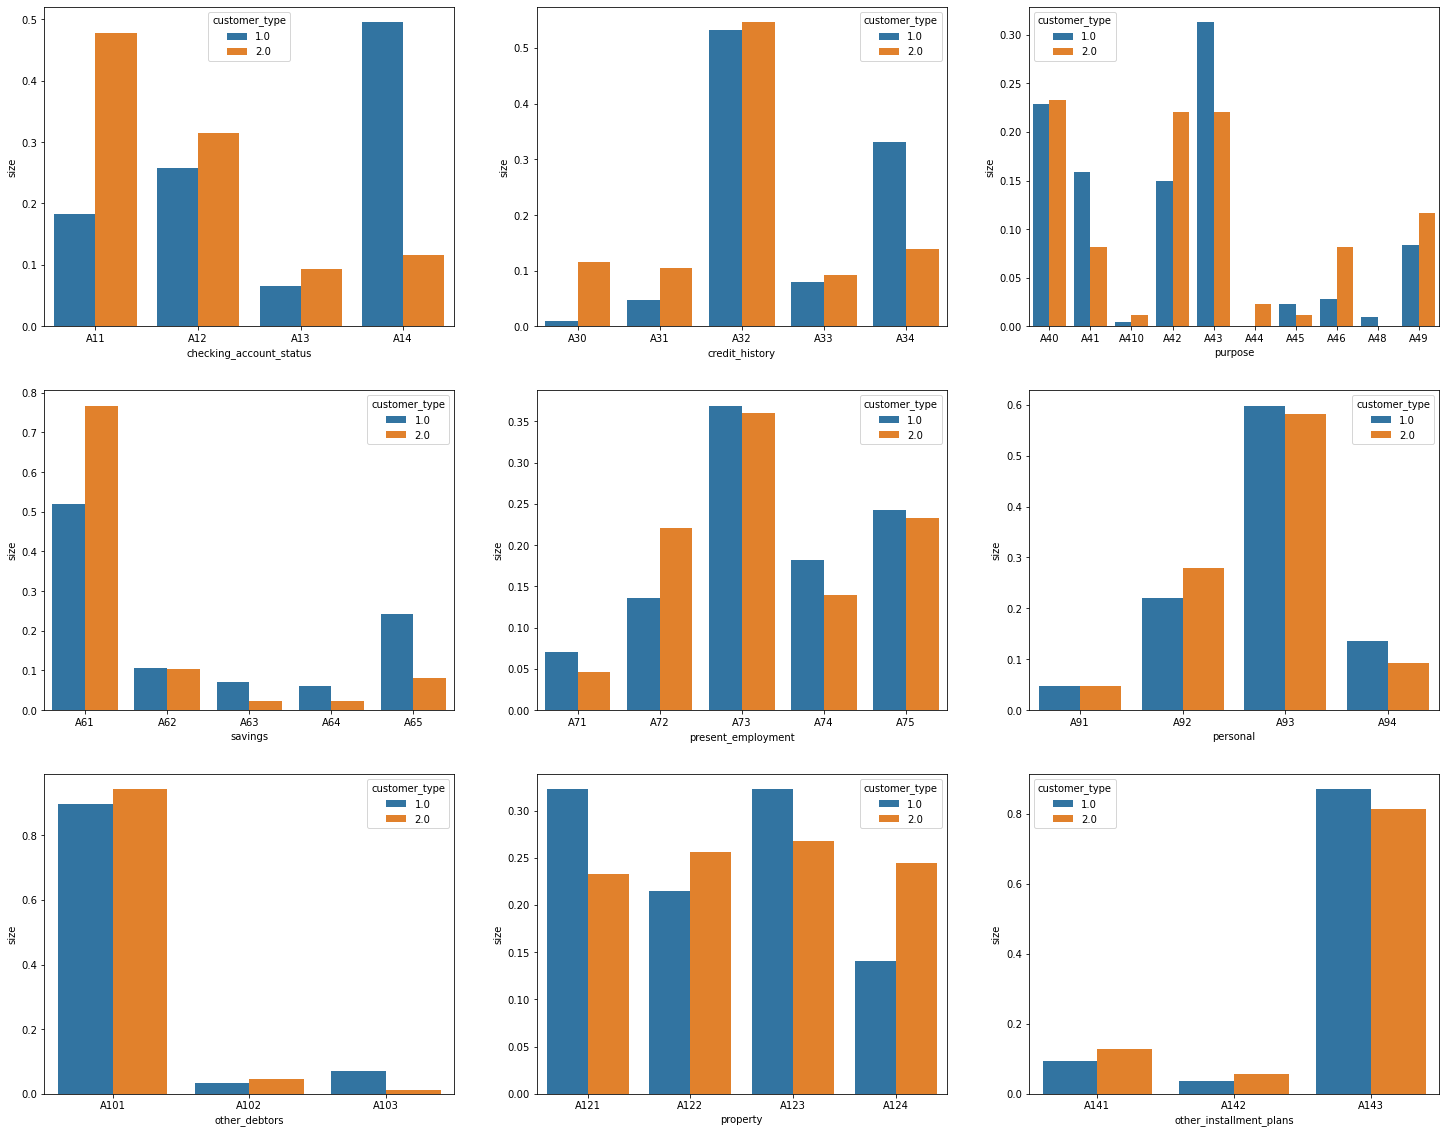

In [76]:
fig, axs = plt.subplots(nrows=3,ncols=3, figsize = (25,20))
df_pom = df.groupby(['checking_account_status', 'customer_type'], as_index=False).size()
df_pom.loc[df_pom['customer_type'] == 1.0, 'size'] = df_pom['size']/214
df_pom.loc[df_pom['customer_type'] == 2.0, 'size'] = df_pom['size']/86
sns.barplot(data=df_pom, x = 'checking_account_status', y = 'size', hue = 'customer_type',ax=axs[0,0])

df_pom = df.groupby(['credit_history', 'customer_type'], as_index=False).size()
df_pom.loc[df_pom['customer_type'] == 1.0, 'size'] = df_pom['size']/214
df_pom.loc[df_pom['customer_type'] == 2.0, 'size'] = df_pom['size']/86
sns.barplot(data=df_pom, x = 'credit_history', y = 'size', hue = 'customer_type', ax=axs[0,1])

df_pom = df.groupby(['purpose', 'customer_type'], as_index=False).size()
df_pom.loc[df_pom['customer_type'] == 1.0, 'size'] = df_pom['size']/214
df_pom.loc[df_pom['customer_type'] == 2.0, 'size'] = df_pom['size']/86
sns.barplot(data=df_pom, x = 'purpose', y = 'size', hue = 'customer_type', ax=axs[0,2])

df_pom = df.groupby(['savings', 'customer_type'], as_index=False).size()
df_pom.loc[df_pom['customer_type'] == 1.0, 'size'] = df_pom['size']/214
df_pom.loc[df_pom['customer_type'] == 2.0, 'size'] = df_pom['size']/86
sns.barplot(data=df_pom, x = 'savings', y = 'size', hue = 'customer_type',ax=axs[1,0])

df_pom = df.groupby(['present_employment', 'customer_type'], as_index=False).size()
df_pom.loc[df_pom['customer_type'] == 1.0, 'size'] = df_pom['size']/214
df_pom.loc[df_pom['customer_type'] == 2.0, 'size'] = df_pom['size']/86
sns.barplot(data=df_pom, x = 'present_employment', y = 'size', hue = 'customer_type', ax=axs[1,1])

df_pom = df.groupby(['personal', 'customer_type'], as_index=False).size()
df_pom.loc[df_pom['customer_type'] == 1.0, 'size'] = df_pom['size']/214
df_pom.loc[df_pom['customer_type'] == 2.0, 'size'] = df_pom['size']/86
sns.barplot(data=df_pom, x = 'personal', y = 'size', hue = 'customer_type', ax=axs[1,2])

df_pom = df.groupby(['other_debtors', 'customer_type'], as_index=False).size()
df_pom.loc[df_pom['customer_type'] == 1.0, 'size'] = df_pom['size']/214
df_pom.loc[df_pom['customer_type'] == 2.0, 'size'] = df_pom['size']/86
sns.barplot(data=df_pom, x = 'other_debtors', y = 'size', hue = 'customer_type', ax=axs[2,0])

df_pom = df.groupby(['property', 'customer_type'], as_index=False).size()
df_pom.loc[df_pom['customer_type'] == 1.0, 'size'] = df_pom['size']/214
df_pom.loc[df_pom['customer_type'] == 2.0, 'size'] = df_pom['size']/86
sns.barplot(data=df_pom, x = 'property', y = 'size', hue = 'customer_type', ax=axs[2,1])

df_pom = df.groupby(['other_installment_plans', 'customer_type'], as_index=False).size()
df_pom.loc[df_pom['customer_type'] == 1.0, 'size'] = df_pom['size']/214
df_pom.loc[df_pom['customer_type'] == 2.0, 'size'] = df_pom['size']/86
sns.barplot(data=df_pom, x = 'other_installment_plans', y = 'size', hue = 'customer_type', ax=axs[2,2])


plt.show()

Wiele słupków układa się bardzo podobnie. Wyrózniają się słupki dotyczące kolumny checking_account_status, gdzie blisko 50% wszystkich
bad klientów ma kategorie A11, podczas gdy goodów ma ją tylko 20% oraz gdzie prawie 50% goodów ma kategorie A14, a badów ma ją tylko 10%.

Z credit_history widzimy, ze 10% badów nigdy wcześniej nie miała kredytu lub spłaciła całkowicie w innym banku.
Znacznie większa część goodów niz badów ma równiez istniejący kredyt w innym banku.

## Analiza pandas-profiling

In [77]:
import sys
!{sys.executable} -m pip install pandas-profiling
from pandas_profiling import ProfileReport

In [78]:
profile = ProfileReport(df, title="Pandasy Profile Report")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/36 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Report został wygenerowany. Możemy go podziwiać pod nazwą "report.html". Przyjrzyjmy się informacjom, które nam dostarcza. Użyty przez nas pandas-profiling z grubsza zrobił to samo co my powyżej, tylko że automatycznie i w czasie kilku sekund. To duży plus, szczególnie przy analizie zbiorów danych z dużą ilością kolumn - wszystkie rutynowe operacje zostały wykonane w mgnieniu oka - rozkłady, macierz korelacji, podstawowe dane opisowe odnoście konkretnych zmiennych, kolumn, wierszy - między innymi szczegółowe infomacje o brakujących rekordach i "problematycznych" wartościach. Jest to więc bardzo przydatne narzędzie, jednak nie może zastąpić szczegółowej ręcznej analizy. W reporcie nie znajdziemy szczegółowych danych statystycznych dotyczących chociażby wartości odstających, jesteśmy ponadto ograniczeni przez autorów biblioteki do stosowania zaproponowanych przez nich wykresów i metod, customizacja reportu jest możliwa, ale trudna. Jest to więc bardzo dobre narzędzie do wstępnej analizy (jest ona wykonywana w kilka sekund), jednak nie może zastąpić on szczegółowej analizy. Warto zaznaczyć też, że narzędzia fajnie jest używać już na odpowiednio przygotowanej ramce danych, bo pandas-profiling wykonuje tylko EDA - nie zamienia żadnych wartości "NaN" czy NULL wedle matematycznych wzorców, nie zamienia danych kategorycznych na numeryczne itp.

# Podsumowanie

Analiza EDA przygotowana przez zespół, który był przez nas walidowany, jest dość obszerna i w naszym odczuciu - całkowicie poprawna. Wnioski, do których dochodziliśmy, były kompletnie analogiczne. Mimo, że pracowaliśmy na zupełnie innych próbkach danych, rozkłady, korelacje, wykresy otrzymywane przez nas były prawie identyczne. Oczywiście pojawiło się trochę błędów kosmetycznych, takich jak pokazanie wykresu zmiennej 'credit_history' zamiast 'savings' w analizie jednowymiarowej czy może Warningi produkowane w Outpucie przy niektórych Inputach (chociaż tu problem może być zupełnie innego rodzaju - możemy używać innych wersji pakietów i bibliotek), nie wpływają one jednak na ogólnie bardzo wysoką jakość analizowanej przez nas pracy.